In [2]:
#                            ------------------------Deep Learning Approach-------------------------

#before proceeding with the deep learning approach; TensorFlow, Keras, and other required libraries  were installed through Anaconda Prompt 
#run the following, if needed:
#pip install tensorflow keras nltk numpy pandas matplotlib scikit-learn

#Importing requires/necessary libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string
import seaborn as sns

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PMYLS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PMYLS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Load dataset
df = pd.read_csv("IMDB Dataset.csv")  

# Display first 5 rows
df.head()

#Explaination:
#Understanding the Dataset
#This dataset has two columns:

#review → The text of the review
#sentiment → "positive" or "negative"



,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
#Text Preprocessing
#Since Deep Learning models work with numerical data, we must clean and convert text into numbers.

stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove punctuation & numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Join words back into a single string
    return " ".join(filtered_tokens)

# Apply preprocessing to the dataset
df['cleaned_review'] = df['review'].apply(preprocess_text)

# Display first few cleaned reviews
df.head()


,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...


In [5]:
#Convert Text into Sequences (Tokenization)
#LSTMs cannot process raw text, so we convert words into numbers.

# Tokenize words and create sequences
tokenizer = Tokenizer(num_words=5000)  # Keep only top 5000 words
tokenizer.fit_on_texts(df['cleaned_review'])

# Convert text to numerical sequences
sequences = tokenizer.texts_to_sequences(df['cleaned_review'])

# Padding sequences to ensure equal length
max_length = 200  # Limit sequence length to 200 words
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding="post")

# Convert sentiment labels into binary values (0 = negative, 1 = positive)
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['sentiment'], test_size=0.2, random_state=42)

# Print dataset shape
X_train.shape, X_test.shape



((40000, 200), (10000, 200))

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Sample dataset - Use your actual dataset instead
texts = ["This movie was great!", "I did not like the film.", "Awesome acting and story!", "The movie was terrible..."]

# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")  # Define max words
tokenizer.fit_on_texts(texts)  # Fit on training texts

# Define vocab_size
vocab_size = 5000  # Ensure it matches Tokenizer(num_words=5000)
print("Vocabulary Size:", vocab_size)


Vocabulary Size: 5000


In [13]:
#Build LSTM Model
#LSTM (Long Short-Term Memory) is great for processing sequential data like text.

# Define the LSTM model
#model = Sequential([
#    Embedding(input_dim=5000, output_dim=128, input_length=max_length),
#    LSTM(64, return_sequences=True),  # First LSTM layer
#    Dropout(0.5),  # Prevent overfitting
#    LSTM(32),  # Second LSTM layer
#    Dense(32, activation='relu'),
#    Dropout(0.5),
#    Dense(1, activation='sigmoid')  # Output layer (Binary classification)
#])

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=128, input_shape=(max_length,)),  # Define input_length
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Print model summary
model.summary()


C:\Users\PMYLS\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 200, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 200, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 200, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 701,857 (2.68 MB)

 Trainable params: 701,857 (2.68 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
#Train the Model
#Now, let's train the model on our dataset.
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

#Note:

#We use 5 epochs (increase if needed).
#Batch size = 64 (smaller batch sizes can help if memory is low).
#adam optimizer is used to improve learning.

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 101s 155ms/step - accuracy: 0.5141 - loss: 0.6963 - val_accuracy: 0.5039 - val_loss: 0.6931
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 100s 159ms/step - accuracy: 0.5008 - loss: 0.6942 - val_accuracy: 0.5020 - val_loss: 0.6930
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 100s 160ms/step - accuracy: 0.5008 - loss: 0.6911 - val_accuracy: 0.5236 - val_loss: 0.6795
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 101s 161ms/step - accuracy: 0.7223 - loss: 0.5220 - val_accuracy: 0.8725 - val_loss: 0.3051
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 98s 157ms/step - accuracy: 0.8820 - loss: 0.2926 - val_accuracy: 0.8821 - val_loss: 0.2816


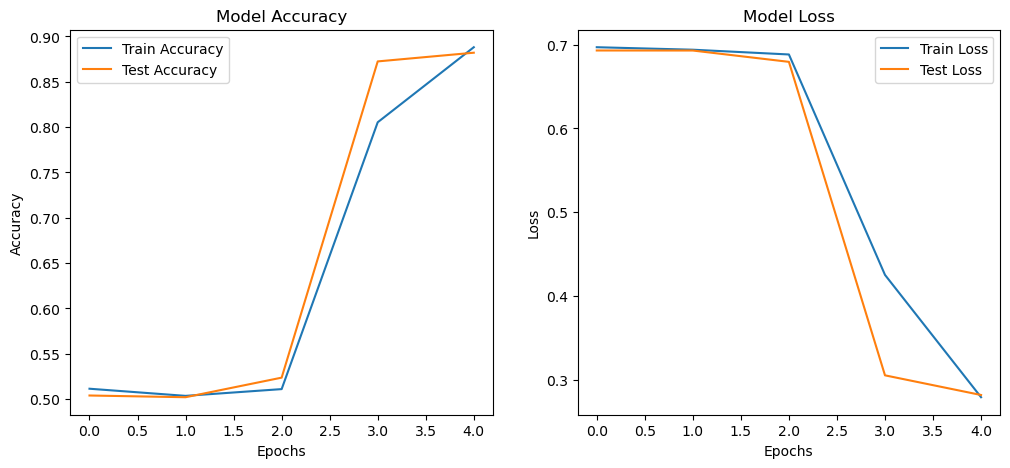

In [15]:
#Evaluate the Model
#Let's check the model’s accuracy and loss:

# Plot accuracy and loss graphs
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4961
           1       0.88      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



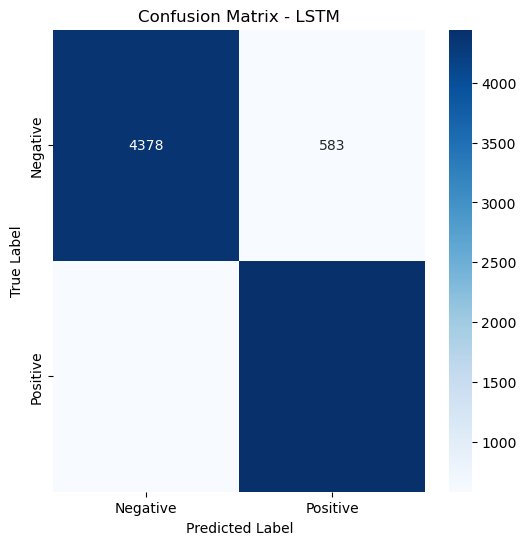

In [16]:
#Test the Model
#Let's check Precision, Recall, and F1-score:

# Predict on test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - LSTM")
plt.show()


In [17]:
#Making Predictions on New Reviews
def predict_sentiment(review):
    review = preprocess_text(review)  # Clean the review
    sequence = tokenizer.texts_to_sequences([review])  # Convert to sequence
    padded = pad_sequences(sequence, maxlen=max_length, padding="post")  # Pad sequence
    prediction = model.predict(padded)[0][0]  # Get prediction
    return "Positive" if prediction > 0.5 else "Negative"

# Test new reviews
review1 = "This movie was fantastic! I really loved the story and the acting was great."
review2 = "Worst movie ever. The plot made no sense and the acting was terrible."

print("Review 1 Sentiment:", predict_sentiment(review1))
print("Review 2 Sentiment:", predict_sentiment(review2))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Review 1 Sentiment: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Review 2 Sentiment: Positive
